In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
%matplotlib inline

In [2]:
def detect_face(frame):
    if frame.ndim != 2:
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    faces = detector.detectMultiScale(frame,1.3,5)
    
    return faces

In [3]:
cam = cv2.VideoCapture(0)
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
#cv2.namedWindow('Face',cv2.WINDOW_AUTOSIZE)
while 1:
    ret,frame = cam.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #faces = detector.detectMultiScale(gray,1.3,5)
    #for (x,y,h,w) in faces:
    #    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.imshow('Face',frame)
    keypress = cv2.waitKey(1)
    if keypress == ord('c'):
        break
cam.release()
cv2.destroyAllWindows()

In [4]:
cv2.imshow('Frame',frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

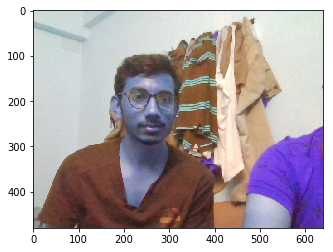

In [5]:
#plt.axis('off') 
plt.imshow(frame,vmin=0,vmax=255,cmap='gray')

In [6]:
gray.shape

(480, 640)

In [7]:
sc = StandardScaler()

In [8]:
gray_sc = sc.fit_transform(gray)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
gray_sc

array([[ 0.63060876,  0.62932231,  0.63141845, ...,  0.98635069,
         0.96845114,  0.96313758],
       [ 0.58371609,  0.58285643,  0.63141845, ...,  1.00289094,
         1.00179571,  0.97988537],
       [ 0.53682342,  0.58285643,  0.63141845, ...,  1.0194312 ,
         1.01846799,  0.97988537],
       ...,
       [-2.46430768, -2.39096014, -2.34850224, ..., -1.09772175,
        -1.08223946, -1.08009299],
       [-2.22984432, -2.29802837, -2.3026573 , ..., -1.06464124,
        -1.06556718, -1.0633452 ],
       [-1.80781025, -2.01923307, -2.11927757, ..., -1.0811815 ,
        -1.06556718, -1.04659741]])

In [10]:
cv2.imshow('Frame',frame)
cv2.imshow('Gray',gray)
cv2.imshow('Gray_Sc',gray_sc)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
frame_re = frame.reshape((480,-1))

In [12]:
frame_re.shape

(480, 1920)

In [13]:
pca = PCA(0.90)

In [14]:
frame_pca = pca.fit_transform(frame_re)

In [15]:
frame_pca.shape

(480, 7)

In [16]:
np.sum(pca.explained_variance_ratio_)

0.9016612061837492

In [17]:
temp = pca.inverse_transform(frame_pca)
temp.shape

(480, 1920)

In [18]:
temp = temp.reshape((480,640,-1))
temp.shape

(480, 640, 3)

In [19]:
cv2.imshow('Frame',frame)
cv2.imshow('Frame_PCA',np.array(temp, dtype = np.uint8 ))#to fix black screen dtype has been mentioned
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
gray = cv2.cvtColor(temp.astype('uint8'),cv2.COLOR_BGR2GRAY)
#cv2.imread()
faces = detector.detectMultiScale(gray,1.3,5)
for (x,y,h,w) in faces:
    cv2.rectangle(temp,(x,y),(x+w,y+h),(255,0,0),2)
cv2.imshow('Frame_PCA',np.array(temp, dtype = np.uint8 ))#to fix black screen dtype has been mentioned
cv2.waitKey(0)
cv2.destroyAllWindows()